# Midterm analysis (with Pandas)

## Grades on 2020.12.04

In [1]:
grades = {
#   'Nota': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'LE': [1,0,2,1,1,1,0,2,1,1,0,3,2,1,7,0,6,2,12,15,169],
    'RE': [2,0,1,3,0,1,0,0,0,1,1,0,4,1,1,3,5,9,24,119,50],
    'PE': [2,0,0,4,1,3,1,5,10,4,7,9,13,29,21,16,23,8,22,5,37]
}  

## Create a data frame from a dictionary

In [2]:
import pandas as pd
df = pd.DataFrame(grades)

If not inside a Jupyter.notebooks, import matplotlib as well

`import matplotlib.pyplot as plt`

## Data frame

In [ ]:
df

## How many grades

In [3]:
#df[['LE', 'RE', 'PE']].sum()
df.sum()

LE    227
RE    225
PE    220
dtype: int64

In [ ]:
df.sum().plot()

## Plot PE, RE, LE

In [ ]:
df['PE'].plot(kind='bar', title='PE Grades', xticks=[0, 4, 8, 12, 16, 20])

In [ ]:
df['RE'].plot(kind='bar', title='RE Grades', xticks=[0, 4, 8, 12, 16, 20])

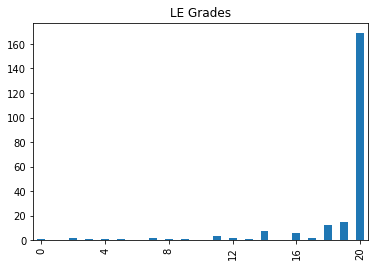

In [4]:
df['LE'].plot(kind='bar', title='LE Grades', xticks=[0, 4, 8, 12, 16, 20])

In [ ]:
df.plot(kind='bar', title='All Grades', yticks=[50, 100, 150], xticks=[0, 4, 8, 12, 16, 20])

## Show stats

In [ ]:
## Mean
df.mean()

In [ ]:
## Median
df.median()

### Not relevant because we have frequencies!

But, maybe a Kolmogorov-Smirnov test for goodness of fit.

In [6]:
def freqs_to_sample(freqs): 
    return [i for i, f in enumerate(freqs) for _ in range(f)]
#freqs_to_sample(df['LE'])

[0,
 2,
 2,
 3,
 4,
 5,
 7,
 7,
 8,
 9,
 11,
 11,
 11,
 12,
 12,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,


In [7]:
from scipy.stats import kstest
kstest(freqs_to_sample(df['LE']), 'norm')[1]

0.0

In [8]:
from scipy.stats import ks_2samp
ks_2samp(freqs_to_sample(df['LE']), freqs_to_sample(df['PE']))[1]

1.1102230246251565e-15

## But the image is clear!

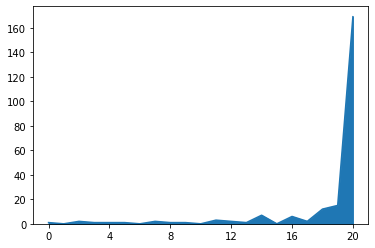

In [9]:
df['LE'].plot(kind='area', xticks=[0, 4, 8, 12, 16, 20])

# Formative vs Summative assessment

## Formative

> **The purpose of formative assessment is to monitor student learning and provide ongoing feedback to staff and students**.

> It is assessment for learning.

> If designed appropriately, it helps students identify their strengths and weaknesses, can enable students to improve their self-regulatory skills so that they manage their education in a less haphazard fashion than is commonly found.

[Leaning & Teaching at Greenwich](https://www.gre.ac.uk/learning-teaching/assessment/assessment/design/formative-vs-summative)

## Summative

> **The goal of summative assessment is to evaluate student learning at the end of an instructional unit by comparing it against some standard or benchmark**. 

> Summative assessments often have high stakes and are treated by the students as the priority over formative assessments.

> However, feedback from summative assessments can be used formatively by both students and faculty to guide their efforts and activities in subsequent courses.

[Leaning & Teaching at Greenwich](https://www.gre.ac.uk/learning-teaching/assessment/assessment/design/formative-vs-summative)

# Conclusões

## Avaliação LE em COVID

> A análise das classificações a meio do semestre mostra que, em condições diferentes daquelas para as quais foi desenhada, a avaliação LE não cumpre o propósito:

- não dá ao professor qualquer feedback válido sobre assuntos que tenham de ser revistos
- não dá ao estudante uma ideia clara dos assuntos que tem de rever.

## Alteração de LE de Sumativa a Formativa
> Esta parcela da avaliação deve passar de "Sumativa" a "Formativa" e não deve contar para a nota final do estudante. 

> Vou incluir esta alteração na secção de Observações da Ficha, com o título de "Alterações COVID", e propor uma modificação na fórmula de cálculo, para passar a ser:

Classificação final = 0 * LE + 5 * RE + 60 * PE + 35 * TE

A avaliação especial (TE, DA, …) mantém-se nos moldes atuais.

**Nesta data, as respostas erradas passam a descontar 1/4 do valor da pergunta.**